# <font color="red">I) Importation des modules</font>

In [10]:
import pprint, itertools
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import neighbors, metrics, model_selection
from matplotlib import pyplot as plt

# <font color='red'>II) Extraction</font>

In [11]:
survived_test = pd.read_csv('gender_submission.csv').set_index('PassengerId')
train = pd.read_csv('train.csv').set_index('PassengerId')
test = pd.read_csv('test.csv').set_index('PassengerId')

# <font color="red">V) Entree et Sortie</font>

In [12]:
survived_train = train['Survived']

In [13]:
train = train.drop('Survived', axis=1)

In [14]:
survived_train = survived_train.to_frame()

### <font color="green">RAS</font>

## <font color="purple">F) test Name</font>

In [39]:
test['Name'].duplicated().unique()

array([False], dtype=object)

In [40]:
test['Name'].notnull().all()

True

#### <font color="purple">Comparaison entre train Name et test Name</font>

#### <font color="blue">Un nom se retrouve-t-il dans les deux sets ?</font> 

In [41]:
name = pd.concat([train['Name'], test['Name']])

In [42]:
name.duplicated().any()

True

In [43]:
name[name.duplicated()]

PassengerId
892        Kelly, Mr. James
898    Connolly, Miss. Kate
Name: Name, dtype: object

In [44]:
name.loc[892], name.loc[898]

('Kelly, Mr. James', 'Connolly, Miss. Kate')

In [45]:
name[name == name.loc[892]]

PassengerId
697    Kelly, Mr. James
892    Kelly, Mr. James
Name: Name, dtype: object

In [46]:
name[name == name.loc[898]]

PassengerId
290    Connolly, Miss. Kate
898    Connolly, Miss. Kate
Name: Name, dtype: object

In [47]:
name[name.duplicated()].iloc[0]

'Kelly, Mr. James'

In [48]:
np.where(train['Name'] == 'Connolly, Miss. Kate'), np.where(test['Name'] == 'Connolly, Miss. Kate')

((array([289]),), (array([6]),))

In [49]:
np.where(train['Name'] == 'Kelly, Mr. James'), np.where(test['Name'] == 'Kelly, Mr. James')

((array([696]),), (array([0]),))

In [50]:
train.iloc[289] == test.iloc[6]

Pclass       True
Name         True
Sex          True
Age         False
SibSp        True
Parch        True
Ticket      False
Fare        False
Cabin       False
Embarked     True
dtype: bool

#### <font color="blue">On ne supprime pas ce doublon</font> 
#### <font color="blue">Ils ont le même nom mais pas le même âge !</font> 

In [51]:
train.iloc[696] == test.iloc[0]

Pclass       True
Name         True
Sex          True
Age         False
SibSp        True
Parch        True
Ticket      False
Fare        False
Cabin       False
Embarked    False
dtype: bool

#### <font color="blue">On ne supprime pas ce doublon</font> 
#### <font color="blue">Ils ont le même nom mais pas le même âge !</font> 

#### <font color="blue">Les Noms sont uniques. Pas de données aberrants. Données Correctes</font> 

### <font color="green">RAS</font>

## <font color="purple">G) train Sex</font>

In [52]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [53]:
train['Sex'].isnull().any()

False

In [54]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

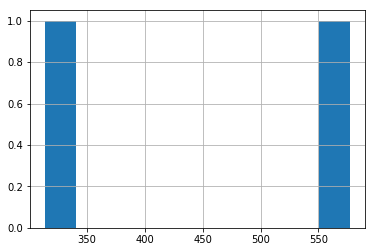

In [55]:
train['Sex'].value_counts().hist()

In [56]:
type(train['Sex'])

pandas.core.series.Series

In [57]:
sex = train['Sex'].map({'male' : 0, 'female' : 1})

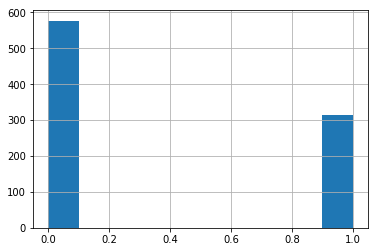

In [58]:
sex.hist()

In [59]:
sexe1 = pd.Series([0, 1], index=['male', 'female'])

In [60]:
sexe2 = train['Sex'].map(sexe1)

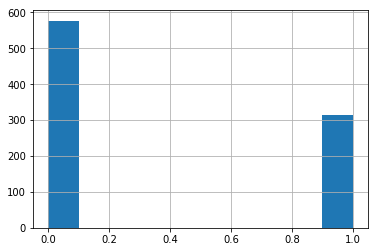

In [61]:
sexe2.hist()

#### <font color="blue">Pas de données aberrantes concernant les sexes !</font> 
#### <font color="blue">Distribution des sexes normale.</font> 

### <font color="green">RAS</font>

## <font color="purple">H) test Sex</font>

In [62]:
test['Sex'].notnull().all()

True

In [63]:
test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [64]:
sex_test = test['Sex'].map({'male' : 0, 'female' : 1})

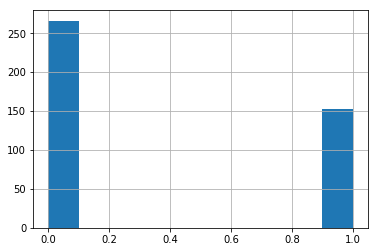

In [65]:
sex_test.hist()

In [66]:
sex.value_counts()/sex.shape[0]*100

0    64.758698
1    35.241302
Name: Sex, dtype: float64

In [67]:
sex_test.value_counts()/sex_test.shape[0]*100

0    63.636364
1    36.363636
Name: Sex, dtype: float64

#### <font color="blue">Distribution des sexes identiques dans le train set et le test set</font> 

### <font color="green">RAS</font>

## <font color="purple">I) train Age<font>

In [68]:
train['Age'].notnull().all()

False

In [69]:
train['Age'].unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [70]:
np.where(train['Age'] == np.nan)

(array([], dtype=int64),)

In [71]:
str(float(train['Age'][train['Age'].isnull()].shape[0])/train['Age'].shape[0]*100) + ' %'

'19.8653198653 %'

#### <font color="blue">Le nettoyage des nan de la colonne age va supprimer 20% des données du train !</font> 

### <font color="red">Données Manquantes</font>

## <font color="purple">J) test Age</font>

In [72]:
test['Age'].unique()

array([ 34.5 ,  47.  ,  62.  ,  27.  ,  22.  ,  14.  ,  30.  ,  26.  ,
        18.  ,  21.  ,    nan,  46.  ,  23.  ,  63.  ,  24.  ,  35.  ,
        45.  ,  55.  ,   9.  ,  48.  ,  50.  ,  22.5 ,  41.  ,  33.  ,
        18.5 ,  25.  ,  39.  ,  60.  ,  36.  ,  20.  ,  28.  ,  10.  ,
        17.  ,  32.  ,  13.  ,  31.  ,  29.  ,  28.5 ,  32.5 ,   6.  ,
        67.  ,  49.  ,   2.  ,  76.  ,  43.  ,  16.  ,   1.  ,  12.  ,
        42.  ,  53.  ,  26.5 ,  40.  ,  61.  ,  60.5 ,   7.  ,  15.  ,
        54.  ,  64.  ,  37.  ,  34.  ,  11.5 ,   8.  ,   0.33,  38.  ,
        57.  ,  40.5 ,   0.92,  19.  ,  36.5 ,   0.75,   0.83,  58.  ,
         0.17,  59.  ,  14.5 ,  44.  ,   5.  ,  51.  ,   3.  ,  38.5 ])

In [73]:
test['Age'].isnull().any()

True

In [74]:
str(round(float(test['Age'][test['Age'].isnull()].shape[0]) / test['Age'].shape[0] * 100)) + ' %'

'21.0 %'

#### <font color="blue">Idem pour le test, la suppression des nan de la colonne age concerne 20% des données !!</font> 

### <font color="red">Données Manquantes</font>

## <font color="purple">K) Nettoyage du train Age</font>

In [75]:
train['Age'][train['Age'].notnull()].unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,  54.  ,   2.  ,  27.  ,  14.  ,
         4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,  15.  ,
        28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,  18.  ,
         3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,  11.  ,
        45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,  33.  ,
        23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,  14.5 ,
        70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,  40.5 ,
        44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,  20.5 ,
        62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,  60.  ,
        10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,  80.  ,
        70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [76]:
clean_age = train['Age'].dropna()

In [77]:
clean_age.between(0, 99).all()

True

In [78]:
clean_age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [79]:
clean_age.unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,  54.  ,   2.  ,  27.  ,  14.  ,
         4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,  15.  ,
        28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,  18.  ,
         3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,  11.  ,
        45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,  33.  ,
        23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,  14.5 ,
        70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,  40.5 ,
        44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,  20.5 ,
        62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,  60.  ,
        10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,  80.  ,
        70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [80]:
clean_age = clean_age.astype('int')

In [81]:
clean_age.unique()

array([22, 38, 26, 35, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15, 28,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

#### <font color="blue">les Ages contenaient des valeurs aberrants Nan et décimaux.</font> 
#### <font color="blue">On a supprimé les Nan et on a retenu la partie entière de chaque âge</font> 

In [82]:
str(round(float(clean_age.shape[0])/train['Age'].shape[0]*100)) + ' %'

'80.0 %'

In [83]:
train.shape

(891, 10)

In [84]:
clean_train = train.loc[clean_age.index]

In [85]:
str(round(float(clean_train.shape[0])/train.shape[0]*100)) + ' %'

'80.0 %'

#### <font color="blue">Vérifions la redistribution des classes dans le clean_train</font> 

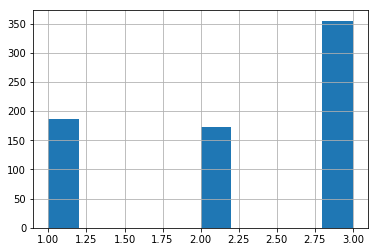

In [86]:
clean_train['Pclass'].hist()

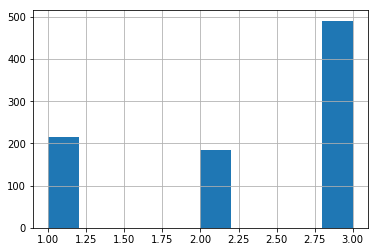

In [87]:
train['Pclass'].hist()

In [88]:
clean_train['Pclass'].value_counts()/clean_train['Pclass'].shape[0]*100

3    49.719888
1    26.050420
2    24.229692
Name: Pclass, dtype: float64

In [89]:
train['Pclass'].value_counts()/train['Pclass'].shape[0]*100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

#### <font color="blue">Conserver la colonne age et nettoyer le train ne change pas la distribution des classes</font> 

In [90]:
clean_train['Sex'].value_counts()/clean_train['Sex'].shape[0]*100

male      63.445378
female    36.554622
Name: Sex, dtype: float64

In [91]:
train['Sex'].value_counts()/train['Sex'].shape[0]*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In [92]:
clean_train['SibSp'].value_counts()/clean_train['SibSp'].shape[0]*100

0    65.966387
1    25.630252
2     3.501401
4     2.521008
3     1.680672
5     0.700280
Name: SibSp, dtype: float64

In [93]:
train['SibSp'].value_counts()/train['SibSp'].shape[0]*100

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

In [94]:
clean_train['Parch'].value_counts()/clean_train['Parch'].shape[0]*100

0    72.969188
1    15.406162
2     9.523810
5     0.700280
3     0.700280
4     0.560224
6     0.140056
Name: Parch, dtype: float64

In [95]:
train['Parch'].value_counts()/train['Parch'].shape[0]*100

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

## <font color="purple">L) Nettoyage du test Age</font>

In [96]:
clean_test_age = test['Age'].dropna()

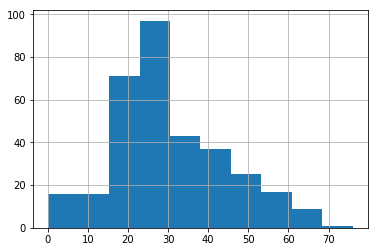

In [97]:
clean_test_age.hist()

In [98]:
clean_test_age.between(0, 99).all()

True

In [99]:
str(round(float(clean_test_age.shape[0])/test['Age'].shape[0]*100)) + ' %'

'79.0 %'

In [100]:
clean_test_age.unique()

array([ 34.5 ,  47.  ,  62.  ,  27.  ,  22.  ,  14.  ,  30.  ,  26.  ,
        18.  ,  21.  ,  46.  ,  23.  ,  63.  ,  24.  ,  35.  ,  45.  ,
        55.  ,   9.  ,  48.  ,  50.  ,  22.5 ,  41.  ,  33.  ,  18.5 ,
        25.  ,  39.  ,  60.  ,  36.  ,  20.  ,  28.  ,  10.  ,  17.  ,
        32.  ,  13.  ,  31.  ,  29.  ,  28.5 ,  32.5 ,   6.  ,  67.  ,
        49.  ,   2.  ,  76.  ,  43.  ,  16.  ,   1.  ,  12.  ,  42.  ,
        53.  ,  26.5 ,  40.  ,  61.  ,  60.5 ,   7.  ,  15.  ,  54.  ,
        64.  ,  37.  ,  34.  ,  11.5 ,   8.  ,   0.33,  38.  ,  57.  ,
        40.5 ,   0.92,  19.  ,  36.5 ,   0.75,   0.83,  58.  ,   0.17,
        59.  ,  14.5 ,  44.  ,   5.  ,  51.  ,   3.  ,  38.5 ])

In [101]:
clean_test_age = clean_test_age.astype('int')

In [102]:
clean_test = test.loc[clean_test_age.index]

In [103]:
str(round(float(clean_test_age.shape[0])/test.shape[0]*100))

'79.0'

#### <font color="blue">La proportion clean_train/train est identique àla proportion clean_test/test</font> 

#### <font color="blue">Vérifions la redistribution des classes dans le clean_train</font> 

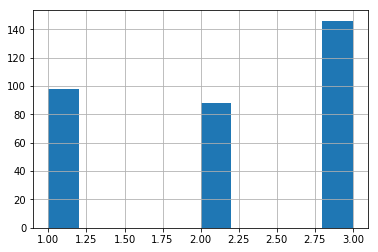

In [104]:
clean_test['Pclass'].hist()

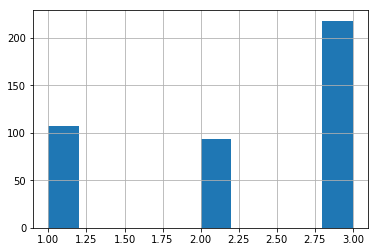

In [105]:
test['Pclass'].hist()

In [106]:
clean_test['Pclass'].value_counts()/clean_test['Pclass'].shape[0]*100

3    43.975904
1    29.518072
2    26.506024
Name: Pclass, dtype: float64

In [107]:
test['Pclass'].value_counts()/test['Pclass'].shape[0]*100

3    52.153110
1    25.598086
2    22.248804
Name: Pclass, dtype: float64

#### <font color="blue">Avec le nettoyage de l'âge dans le testing set</font> 
#### <font color="blue">la distribution des class est sensiblement modifiée</font> 
#### <font color="blue">On garde cependant une redistribution acceptable.</font> 
#### <font color="blue">C'est à se demander si la classe n'est pas finalement liée à l'âge</font> 
#### <font color="blue">Au lieu de supprimer les lignes d'âge manquant,</font> 
#### <font color="blue">on peut les remplacer par l'âge moyen de sa classe.</font> 

In [108]:
clean_test['Sex'].value_counts()/clean_test['Sex'].shape[0]*100

male      61.746988
female    38.253012
Name: Sex, dtype: float64

In [109]:
test['Sex'].value_counts()/test['Sex'].shape[0]*100

male      63.636364
female    36.363636
Name: Sex, dtype: float64

In [110]:
clean_test['SibSp'].value_counts()/clean_test['SibSp'].shape[0]*100

0    64.457831
1    29.216867
2     3.313253
4     1.204819
3     1.204819
8     0.301205
5     0.301205
Name: SibSp, dtype: float64

In [111]:
test['SibSp'].value_counts()/test['SibSp'].shape[0]*100

0    67.703349
1    26.315789
2     3.349282
4     0.956938
3     0.956938
8     0.478469
5     0.239234
Name: SibSp, dtype: float64

In [112]:
clean_test['Parch'].value_counts()/clean_test['Parch'].shape[0]*100

0    74.397590
1    15.060241
2     8.734940
3     0.903614
6     0.301205
5     0.301205
4     0.301205
Name: Parch, dtype: float64

In [113]:
test['Parch'].value_counts()/test['Parch'].shape[0]*100

0    77.511962
1    12.440191
2     7.894737
3     0.717703
9     0.478469
4     0.478469
6     0.239234
5     0.239234
Name: Parch, dtype: float64

#### <font color="blue">Pour les autres colonnes, on garde la même redistribution après un nettoyage de l'âge</font> 

## <font color="purple">M) train SibSp</font>

In [114]:
train['SibSp'].notnull().all()

True

In [115]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

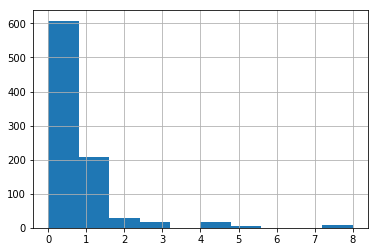

In [116]:
train['SibSp'].hist()

In [117]:
train['SibSp'].value_counts()/train['SibSp'].shape[0]*100

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

#### <font color="blue">Le nombre de frères, de soeurs et d'épouses tournent autour de 0, 1 et 2.</font> 
#### <font color="blue">C'est cohérent !</font> 

### <font color="green">RAS</font>

## <font color="purple">N) test SibSp</font>

In [118]:
test['SibSp'].notnull().all()

True

In [119]:
test['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

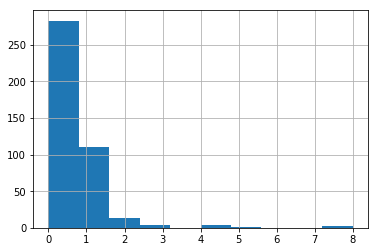

In [120]:
test['SibSp'].hist()

In [121]:
test['SibSp'].value_counts()/test['SibSp'].shape[0]*100

0    67.703349
1    26.315789
2     3.349282
4     0.956938
3     0.956938
8     0.478469
5     0.239234
Name: SibSp, dtype: float64

#### <font color="blue">Le nombre de frères et soeurs tourne autour de 0, 1 et 2</font> 
#### <font color="blue">C'est cohérent !</font> 

In [122]:
abs(train['SibSp'].value_counts()/train['SibSp'].shape[0]*100 - test['SibSp'].value_counts()/test['SibSp'].shape[0]*100)

0    0.534586
1    2.858999
2    0.206746
4    1.063264
3    0.838797
8    0.307165
5    0.321933
Name: SibSp, dtype: float64

#### <font color="blue">La distribution du nombre de frères, soeurs, épouses en train ou en test est quasi-identique</font> 

### <font color="green">RAS</font>

## <font color="purple">O) train Parch</font>

In [123]:
train['Parch'].notnull().all()

True

In [124]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

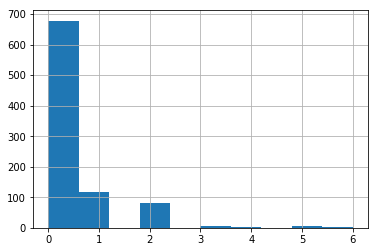

In [125]:
train['Parch'].hist()

In [126]:
train['Parch'].value_counts()/train['Parch'].shape[0]*100

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

#### <font color="blue">Le nombre de parents et d'enfants tournent autour de 0, 1 et 2.</font> 
#### <font color="blue">C'est cohérent !</font> 

### <font color="green">RAS</font>

## <font color="purple">P) test Parch</font>

In [127]:
test['Parch'].notnull().all()

True

In [128]:
test['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9])

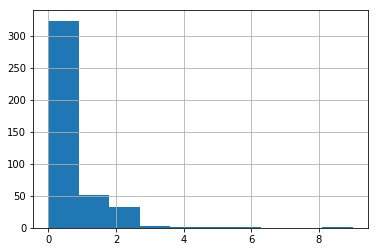

In [129]:
test['Parch'].hist()

In [130]:
test['Parch'].value_counts()/test['Parch'].shape[0]*100

0    77.511962
1    12.440191
2     7.894737
3     0.717703
9     0.478469
4     0.478469
6     0.239234
5     0.239234
Name: Parch, dtype: float64

In [131]:
abs(test['Parch'].value_counts()/test['Parch'].shape[0]*100-train['Parch'].value_counts()/train['Parch'].shape[0]*100)

0    1.417686
1    0.803355
2    1.083939
3    0.156536
4    0.029535
5    0.321933
6    0.127001
9         NaN
Name: Parch, dtype: float64

#### <font color="blue">Les proportions du Parch dans le train sont quasiment identiques dans le test.</font> 
#### <font color="blue">On remarquera que la valeur 9 n'existe pas dans le train.</font> 

### <font color="green">RAS</font>

## <font color="purple">Q) train Ticket</font>

In [132]:
train['Ticket'].notnull().all()

True

In [133]:
train['Ticket'].head()

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object

In [134]:
train['Ticket'].unique().shape[0]

681

#### <font color="blue">Il y a des numéros de tickets qui se répétent</font> 
#### <font color="blue">En même temps, il y a beaucoup de numéros de ticket</font> 
#### <font color="blue">Les numéros de tickets sont-ils à prendre en compte dans la prédiction</font> 
#### <font color="blue">On pourra s'intéresser à la corrélation entre la répétition du nombre de ticket et le résultat de prédiction</font> 
#### <font color="blue">Est ce que les gens ayant les mêmes tickets étaient ensemble au moment du naufrage et ont donc survécus ou péris ensemble ?</font> 

In [135]:
type(train['Ticket']), type(train['Ticket'].unique()), train['Ticket'].dtype

(pandas.core.series.Series, numpy.ndarray, dtype('O'))

In [136]:
train_tickets_val_counts = train['Ticket'].value_counts()
train_tickets_val_counts[train_tickets_val_counts > 4]

CA. 2343        7
347082          7
1601            7
347088          6
CA 2144         6
3101295         6
382652          5
S.O.C. 14879    5
Name: Ticket, dtype: int64

In [137]:
ticket = train['Ticket'].unique().astype('int')

### <font color="green">RAS</font>

## <font color="purple">R) test Ticket</font>

In [138]:
test['Ticket'].notnull().all()

True

#### <font color="blue">Les ticket numbers sont des initiales suivies de nombres ou des nombres</font> 

### <font color="green">RAS</font>

## <font color="purple">S) train Fare</font>

In [139]:
train['Fare'].notnull().all()

True

In [140]:
(train['Fare'] < 0).any()

False

In [141]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### <font color="blue">On arrondit les tarifs en entier</font> 

In [142]:
fare = train['Fare'].astype('int')

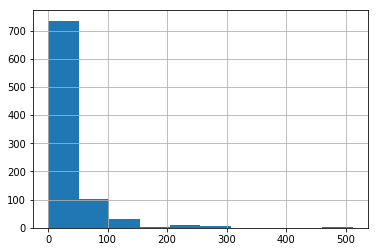

In [143]:
fare.hist()

#### <font color="blue">La majorité des tarifs sont compris entre 0 et 150 dollars.</font> 

In [144]:
fare.describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

#### <font color="blue">La moyenne des tarifs est 31 et la médiane est 14. Les tarifs sont cohérents</font> 

### <font color="green">RAS</font>

## <font color="purple">T) test Fare</font>

In [145]:
test['Fare'].notnull().all()

False

In [146]:
test['Fare'].shape[0]

418

In [147]:
(test['Fare'] < 0).any()

False

In [148]:
clean_fare = test['Fare'][test['Fare'].notnull()]

In [149]:
clean_fare.shape[0]

417

In [150]:
str(round(float(clean_fare.shape[0])/test['Fare'].shape[0]*100)) + ' %'

'100.0 %'

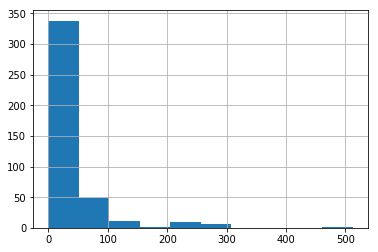

In [151]:
clean_fare.hist()

In [152]:
clean_fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [153]:
clean_fare.median()

14.4542

#### <font color="blue">Les tarifs du test nettoyé gardent une distribution similaire au train</font> 
#### <font color="blue">Ils présentent même des moyennes proches et une médiane identique !</font> 

### <font color="green">RAS</font>

## <font color="purple">U) train Cabin</font>

In [154]:
train['Cabin'].head()

PassengerId
1     NaN
2     C85
3     NaN
4    C123
5     NaN
Name: Cabin, dtype: object

In [155]:
train['Cabin'].unique().shape

(148,)

In [156]:
train['Bridge'] = train['Cabin'].str.slice(0,2)
train['Bridge'].unique()

array([nan, 'C8', 'C1', 'E4', 'G6', 'D5', 'A6', 'C2', 'B7', 'D3', 'B3',
       'C5', 'B2', 'F3', 'F ', 'E3', 'A5', 'D1', 'D2', 'B5', 'E1', 'D4',
       'B8', 'F2', 'B1', 'A7', 'C4', 'F4', 'A3', 'B4', 'C9', 'C7', 'E6',
       'B9', 'D7', 'A1', 'D', 'C6', 'C3', 'T', 'E5', 'E2', 'A2', 'D9',
       'E8', 'E7', 'D6', 'B6'], dtype=object)

In [157]:
train['Cabin'].isnull().any()

True

#### <font color="blue">Il faut nettoyer la colonne Cabin et voir si le train reste homogène par rapport au début.</font> 

In [158]:
clean_cabin = train['Cabin'][train['Cabin'].notnull()]

In [159]:
str(round(float(clean_cabin.shape[0])/train['Cabin'].shape[0]*100)) + ' %'

'23.0 %'

#### <font color="blue">Le train nettoyé représente seulement 23% du train de départ !</font> 
#### <font color="blue">Le nettoyage du numéro des cabines a un impact direct sur la taille du training set</font> 
#### <font color="blue">et donc aura un impact sur le modèle.</font> 

In [160]:
clean_cabin.head()

PassengerId
2      C85
4     C123
7      E46
11      G6
12    C103
Name: Cabin, dtype: object

#### <font color="blue">Données manquantes supprimées</font> 

### <font color="red">Données Manquantes</font>

## <font color="purple">V) test Cabin</font>

In [161]:
test['Cabin'].notnull().all()

False

In [162]:
test['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116', 'F',
       'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22', 'B10',
       'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64', 'A11',
       'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89', 'F E46',
       'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78', 'F E57', 'F2',
       'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60', 'E50', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7', 'D40', 'D38',
       'C105'], dtype=object)

In [163]:
test['Bridge'] = test['Cabin'].str.slice(0,2)
test['Bridge'].unique()

array([nan, 'B4', 'E3', 'B5', 'B3', 'A2', 'C7', 'D3', 'D1', 'A9', 'C3',
       'C2', 'F ', 'B6', 'C5', 'D4', 'C1', 'B7', 'C4', 'F', 'G6', 'C6',
       'E4', 'C9', 'D2', 'B1', 'F4', 'E5', 'A1', 'C8', 'F3', 'A3', 'D',
       'B2', 'F2', 'E6'], dtype=object)

#### <font color="blue">Il faut nettoyer la colonne Cabin et voir si le train reste homogène par rapport au début.</font> 

In [164]:
clean_test_cabin = test['Cabin'][test['Cabin'].notnull()]

In [165]:
str(round(float(clean_cabin.shape[0])/test['Cabin'].shape[0]*100)) + ' %'

'49.0 %'

#### <font color="blue">Le test nettoyé représente 49% du test total.</font> 
#### <font color="blue">On perd la moitié du testing set.</font> 
#### <font color="blue">Il faut trouver un moyen de combler ce vide ou </font> 
#### <font color="blue">tout simplement ne pas nettoyer cette colonne et la supprimer</font> 

### <font color="red">Données Manquantes</font>

## <font color="purple">W) train Embarked</font>

In [166]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [167]:
train['Embarked'].notnull().all()

False

In [168]:
clean_embarked = train['Embarked'][train['Embarked'].notnull()]

In [169]:
str(round(float(clean_embarked.shape[0])/train['Embarked'].shape[0]*100)) + ' %'

'100.0 %'

In [170]:
clean_embarked.shape[0], train['Embarked'].shape[0]

(889, 891)

In [171]:
clean_embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

### <font color="red">Données Manquantes</font>

## <font color="purple">X) test Embarked</font>

In [172]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [173]:
test['Embarked'].notnull().all()

True

In [174]:
clean_test_embarked = test['Embarked'][test['Embarked'].notnull()]

In [175]:
str(round(float(clean_test_embarked.shape[0])/test['Embarked'].shape[0]*100)) + ' %'

'100.0 %'

In [176]:
clean_embarked.shape[0], train['Embarked'].shape[0]

(889, 891)

In [177]:
clean_test_embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

#### <font color="blue">données manquantes supprimées</font> 

### <font color="red">Données Manquantes</font>

# <font color="red">Vii) Modelisation</font>

### <font color="purple">Impact des supressions des nan</font>
#### <font color="blue">Supprimons les lignes de train qui contiennent des NaN</font>
#### <font color="blue">Cela concerne Age, Embarked, Cabin</font> 

In [178]:
clean_train_embarked = train[train['Embarked'].notnull()]

str(round(float(clean_train_embarked.shape[0])/train.shape[0]*100)) + ' %'

'100.0 %'

In [179]:
clean_test_embarked = test[test['Embarked'].notnull()]

str(round(float(clean_test_embarked.shape[0])/test.shape[0]*100)) + ' %'

'100.0 %'

#### <font color="blue">Le nettoyage avec le Embarked ne supprime pas beaucoup de données.
</font>

In [180]:
clean_train_age = train[train['Age'].notnull()]

str(round(float(clean_train_age.shape[0])/train.shape[0]*100)) + ' %'

'80.0 %'

In [181]:
clean_test_age = test[test['Age'].notnull()]

str(round(float(clean_test_age.shape[0])/test.shape[0]*100)) + ' %'

'79.0 %'

#### <font color="blue">Le nettoyage avec l'âge supprime tout de même 20% des données</font> 

In [182]:
clean_train_cabin = train[train['Cabin'].notnull()]

str(round(float(clean_train_cabin.shape[0])/train.shape[0]*100)) + ' %'

'23.0 %'

In [183]:
clean_test_cabin = test[test['Cabin'].notnull()]

float(clean_test_cabin.shape[0])/test.shape[0]*100

21.770334928229666

#### <font color="blue">Le nettoyage avec Cabin ne garde que 20% des données</font>

## <font color="purple">Nettoyage</font>

### <font color="brown">Clean avec Age et Embarked</font>

In [184]:
clean_train_embarked_age = train[train['Age'].notnull() & train['Embarked'].notnull()]

str(round(float(clean_train_embarked_age.shape[0])/train.shape[0]*100)) + ' %'

'80.0 %'

In [185]:
clean_test_embarked_age = test[test['Age'].notnull() & test['Embarked'].notnull()]

str(round(float(clean_test_embarked_age.shape[0])/test.shape[0]*100)) + ' %'

'79.0 %'

#### <font color="blue">Le nettoyage du train avec l'age et l'embarked correspond au nettoyage du train avec l'age uniquement</font> 
#### <font color="blue">Les nan embarked sont donc quasiment tous inclus dans les nan de l'age</font> 

In [186]:
index = pd.Series(clean_train_embarked.index.isin(clean_train_age.index))

index.value_counts()/index.shape[0]*100

True     80.089989
False    19.910011
dtype: float64

In [187]:
index = pd.Series(clean_test_embarked.index.isin(clean_test_age.index))

index.value_counts()/index.shape[0]*100

True     79.425837
False    20.574163
dtype: float64

#### <font color="blue">oui les nan embarked sont à 80% inclus dans les nan Age</font> 
#### <font color="blue">on va donc conserver ce nettoyage et on verra plutard pour les numéros de cabines</font> 

In [188]:
clean_train_embarked_age.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Bridge
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C8
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


### <font color="brown">Drop avec Cabin, Bridge, Name et Ticket</font>

In [189]:
clean_train_embarked_age = clean_train_embarked_age.drop(['Cabin', 'Bridge'], axis=1)

In [190]:
clean_train_embarked_age.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [191]:
clean_train_embarked_age.drop(['Name', 'Ticket'], axis=1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S
7,1,male,54.0,0,0,51.8625,S
8,3,male,2.0,3,1,21.0750,S
9,3,female,27.0,0,2,11.1333,S
10,2,female,14.0,1,0,30.0708,C


### <font color="brown">Age et Fare astype int</font>

In [192]:
clean_train_embarked_age['Age'] = clean_train_embarked_age['Age'].astype('int')
clean_train_embarked_age['Fare'] = clean_train_embarked_age['Fare'].astype('int')

In [193]:
clean_train_embarked_age.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C
3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S
5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S


In [194]:
clean_train_embarked_age_drop_cabin_bridge_name_ticket = clean_train_embarked_age.drop(['Name', 'Ticket'], axis=1)

In [195]:
clean_train_embarked_age_drop_cabin_bridge_name_ticket.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22,1,0,7,S
2,1,female,38,1,0,71,C
3,3,female,26,0,0,7,S
4,1,female,35,1,0,53,S
5,3,male,35,0,0,8,S


In [196]:
clean_test_embarked_age_drop_cabin_bridge_name_ticket = clean_test_embarked_age.drop(['Cabin', 'Bridge', 'Name', 'Ticket'], axis=1)
clean_test_embarked_age_drop_cabin_bridge_name_ticket['Age'] = clean_test_embarked_age_drop_cabin_bridge_name_ticket['Age'].astype('int')
# clean_test_embarked_age_drop_cabin_bridge_name_ticket['Fare'] = clean_test_embarked_age_drop_cabin_bridge_name_ticket['Fare'].astype('int')

In [197]:
type(survived_train.head())

pandas.core.frame.DataFrame

### <font color="brown">Nettoyage de Fare dans le test</font>

In [198]:
clean_test_embarked_age_drop_cabin_bridge_name_ticket['Fare'].notnull().all()

False

#### <font color="blue">Rappel Le Fare n'a pas de valeurs manquantes dans le train</font> 
#### <font color="blue">Le Fare a une valeur manquante dans le test.</font> 
#### <font color="blue">on nettoye les deux en supprimant la ligne</font> 

In [199]:
test['Fare'][test['Fare'].isnull()].index

Int64Index([1044], dtype='int64', name=u'PassengerId')

In [200]:
clean_test_embarked_age_drop_cabin_bridge_name_ticket = clean_test_embarked_age_drop_cabin_bridge_name_ticket.drop(test['Fare'][test['Fare'].isnull()].index, axis=0)

In [201]:
clean_test_embarked_age_drop_cabin_bridge_name_ticket['Fare'] = clean_test_embarked_age_drop_cabin_bridge_name_ticket['Fare'].astype('int')

In [202]:
clean_test_embarked_age_drop_cabin_bridge_name_ticket.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34,0,0,7,Q
893,3,female,47,1,0,7,S
894,2,male,62,0,0,9,Q
895,3,male,27,0,0,8,S
896,3,female,22,1,1,12,S


### <font color="brown">Définition des sets de base Drop cabin name ticket bridge</font>

In [203]:
train_final = clean_train_embarked_age_drop_cabin_bridge_name_ticket
test_final = clean_test_embarked_age_drop_cabin_bridge_name_ticket

In [204]:
train_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22,1,0,7,S
2,1,female,38,1,0,71,C
3,3,female,26,0,0,7,S
4,1,female,35,1,0,53,S
5,3,male,35,0,0,8,S


In [205]:
test_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34,0,0,7,Q
893,3,female,47,1,0,7,S
894,2,male,62,0,0,9,Q
895,3,male,27,0,0,8,S
896,3,female,22,1,1,12,S


In [206]:
survived_train_final = survived_train.loc[train_final.index]
survived_test_final = survived_test.loc[test_final.index]

In [207]:
survived_train_final.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [208]:
survived_test_final.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [209]:
print 'Train : ' + str(round(float(train_final.shape[0])/train.shape[0]*100)) + ' %'
print 'Test : ' + str(round(float(test_final.shape[0])/test.shape[0]*100)) + ' %'

Train : 80.0 %
Test : 79.0 %


In [210]:
scores = dict()

### <font color="brown">Set without sex and Embarked Drop cabin name ticket bridge</font>

In [211]:
train_final_without_sex_embarked = train_final[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]
test_final_without_sex_embarked = test_final[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]

train_final_without_sex_embarked.shape, survived_train_final.shape[0]

train_final_without_sex_embarked.values, train_final_without_sex_embarked.keys
type(train_final_without_sex_embarked)

pandas.core.frame.DataFrame

### <font color="brown">Score du Classifieur KNN</font>

In [212]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_final_without_sex_embarked.values, survived_train_final.values.flatten())
score_without_sex_embarked = neigh.score(test_final_without_sex_embarked.values, survived_test_final.values.flatten())
print('score_without_sex_embarked = ' + str(score_without_sex_embarked))

score_without_sex_embarked = 0.570996978852


In [213]:
scores['Drop cabin name ticket bridge Without sex embarked'] = score_without_sex_embarked

### <font color="brown">Set only with Age and Pclass</font>

In [214]:
train_final_age_pclass = train_final[['Age', 'Pclass']]
test_final_age_pclass = test_final[['Age', 'Pclass']]

train_final_age_pclass.shape, survived_train_final.shape[0]

train_final_age_pclass.values, train_final_age_pclass.keys
type(train_final_age_pclass)

pandas.core.frame.DataFrame

### <font color="brown">Score du Classifieur KNN</font>

In [215]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_final_age_pclass.values, survived_train_final.values.flatten())
score_age_pclass = neigh.score(test_final_age_pclass.values, survived_test_final.values.flatten())
print('score_age_pclass = ' + str(score_age_pclass))

score_age_pclass = 0.546827794562


In [216]:
scores['Drop cabin name ticket bridge only age pclass'] = score_age_pclass

In [217]:
pprint.pprint(scores)

{'Drop cabin name ticket bridge Without sex embarked': 0.57099697885196377,
 'Drop cabin name ticket bridge only age pclass': 0.54682779456193353}


### <font color="brown">Preprocess Sex</font>

In [218]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['male', 'female'])

print le.classes_
print le.transform(train_final['Sex'])[:10] 
print (train_final['Sex'] == le.inverse_transform(le.transform(train_final['Sex']))).all()

new_train_sex = le.transform(train_final['Sex'])
new_test_sex = le.transform(test_final['Sex'])

['female' 'male']
[1 0 0 0 1 1 1 0 0 0]
True


In [219]:
train_index = train_final['Sex'].index
test_index = test_final['Sex'].index

train_final['Sex'] = pd.Series(new_train_sex, index=train_index)
test_final['Sex'] = pd.Series(new_test_sex, index=test_index)

train_final.head(), test_final.head()

(             Pclass  Sex  Age  SibSp  Parch  Fare Embarked
 PassengerId                                               
 1                 3    1   22      1      0     7        S
 2                 1    0   38      1      0    71        C
 3                 3    0   26      0      0     7        S
 4                 1    0   35      1      0    53        S
 5                 3    1   35      0      0     8        S,
              Pclass  Sex  Age  SibSp  Parch  Fare Embarked
 PassengerId                                               
 892               3    1   34      0      0     7        Q
 893               3    0   47      1      0     7        S
 894               2    1   62      0      0     9        Q
 895               3    1   27      0      0     8        S
 896               3    0   22      1      1    12        S)

### <font color="brown">Preprocess Embarked</font>

In [220]:
le.fit(['S', 'C', 'Q'])

print train_final['Embarked'].unique()
print le.classes_
print le.transform(train_final['Embarked'])[:10]
print le.transform(test_final['Embarked'])[:10] 
print (train_final['Embarked'] == le.inverse_transform(le.transform(train_final['Embarked']))).all()

new_train_embarked = le.transform(train_final['Embarked'])
new_test_embarked = le.transform(test_final['Embarked'])

['S' 'C' 'Q']
['C' 'Q' 'S']
[2 0 2 2 2 2 2 2 0 2]
[1 2 1 2 2 2 1 2 0 2]
True


In [221]:
train_index = train_final['Embarked'].index
train_final['Embarked'] = pd.Series(new_train_embarked, index=train_index)
train_final.head()

test_index = test_final['Embarked'].index
test_final['Embarked'] = pd.Series(new_test_embarked, index=test_index)
test_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34,0,0,7,1
893,3,0,47,1,0,7,2
894,2,1,62,0,0,9,1
895,3,1,27,0,0,8,2
896,3,0,22,1,1,12,2


In [222]:
train_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22,1,0,7,2
2,1,0,38,1,0,71,0
3,3,0,26,0,0,7,2
4,1,0,35,1,0,53,2
5,3,1,35,0,0,8,2


### <font color="brown">Set without embarked</font>

In [223]:
train_final_without_embarked = train_final[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex']]
test_final_without_embarked = test_final[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex']]

train_final_without_embarked.shape, survived_train_final.shape[0]

train_final_without_embarked.values, train_final_without_embarked.keys
type(train_final_age_pclass)

pandas.core.frame.DataFrame

In [224]:
train_final_without_embarked.head()

,Age,Pclass,SibSp,Parch,Fare,Sex
PassengerId,,,,,,
1,22,3,1,0,7,1
2,38,1,1,0,71,0
3,26,3,0,0,7,0
4,35,1,1,0,53,0
5,35,3,0,0,8,1


In [225]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
train_final_without_embarked.values

array([[22,  3,  1,  0,  7,  1],
       [38,  1,  1,  0, 71,  0],
       [26,  3,  0,  0,  7,  0],
       ..., 
       [19,  1,  0,  0, 30,  0],
       [26,  1,  0,  0, 30,  1],
       [32,  3,  0,  0,  7,  1]])

In [226]:
neigh.fit(train_final_without_embarked.values, survived_train_final.values.flatten())
score_without_embarked = neigh.score(test_final_without_embarked.values, survived_test_final.values.flatten())
print('score_without_embarked = ' + str(score_without_embarked))

score_without_embarked = 0.622356495468


In [227]:
scores['Drop cabin name ticket bridge without embarked'] = score_without_embarked

### <font color="brown">Set without sex</font>

In [228]:
train_final_without_sex = train_final[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked']]
test_final_without_sex = test_final[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked']]

train_final_without_sex.shape, survived_train_final.shape[0]

train_final_without_sex.values, train_final_without_sex.keys
type(train_final_age_pclass)

pandas.core.frame.DataFrame

In [229]:
train_final_without_sex.head()

,Age,Pclass,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
1,22,3,1,0,7,2
2,38,1,1,0,71,0
3,26,3,0,0,7,2
4,35,1,1,0,53,2
5,35,3,0,0,8,2


In [230]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
train_final_without_sex.values

array([[22,  3,  1,  0,  7,  2],
       [38,  1,  1,  0, 71,  0],
       [26,  3,  0,  0,  7,  2],
       ..., 
       [19,  1,  0,  0, 30,  2],
       [26,  1,  0,  0, 30,  0],
       [32,  3,  0,  0,  7,  1]])

In [231]:
neigh.fit(train_final_without_sex.values, survived_train_final.values.flatten())
score_without_sex = neigh.score(test_final_without_sex.values, survived_test_final.values.flatten())
print('score_without_sex = ' + str(score_without_sex))

score_without_sex = 0.577039274924


In [232]:
scores['Drop cabin name ticket bridge without sex'] = score_without_sex

### <font color="brown">Set with all</font>

In [233]:
train_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22,1,0,7,2
2,1,0,38,1,0,71,0
3,3,0,26,0,0,7,2
4,1,0,35,1,0,53,2
5,3,1,35,0,0,8,2


In [234]:
train_final_age = train_final[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]
test_final_age = test_final[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]

train_final_age.shape, survived_train_final.shape[0]

train_final_age.values, train_final_age.keys
type(train_final_age)

pandas.core.frame.DataFrame

In [235]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
train_final.values

array([[ 3,  1, 22, ...,  0,  7,  2],
       [ 1,  0, 38, ...,  0, 71,  0],
       [ 3,  0, 26, ...,  0,  7,  2],
       ..., 
       [ 1,  0, 19, ...,  0, 30,  2],
       [ 1,  1, 26, ...,  0, 30,  0],
       [ 3,  1, 32, ...,  0,  7,  1]])

In [236]:
neigh.fit(train_final.values, survived_train_final.values.flatten()) 
score_drop = neigh.score(test_final.values, survived_test_final.values.flatten())
print('score_drop = ' + str(score_drop))

score_drop = 0.604229607251


In [237]:
scores['Drop cabin name ticket bridge'] = score_drop

In [238]:
pprint.pprint(scores)

{'Drop cabin name ticket bridge': 0.60422960725075525,
 'Drop cabin name ticket bridge Without sex embarked': 0.57099697885196377,
 'Drop cabin name ticket bridge only age pclass': 0.54682779456193353,
 'Drop cabin name ticket bridge without embarked': 0.62235649546827798,
 'Drop cabin name ticket bridge without sex': 0.57703927492447127}


## <font color="purple">KNN Classifier sur toutes les sous-Combinaisons train_final</font>

In [239]:
train_final.columns.values

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype=object)

In [240]:
liste = list(train_final.columns.values)
for i, e in enumerate(itertools.combinations(liste, 2)) : print i, list(e)
for i, e in enumerate(itertools.combinations(liste, 7)) : print i, list(e)
print len(liste)

0 ['Pclass', 'Sex']
1 ['Pclass', 'Age']
2 ['Pclass', 'SibSp']
3 ['Pclass', 'Parch']
4 ['Pclass', 'Fare']
5 ['Pclass', 'Embarked']
6 ['Sex', 'Age']
7 ['Sex', 'SibSp']
8 ['Sex', 'Parch']
9 ['Sex', 'Fare']
10 ['Sex', 'Embarked']
11 ['Age', 'SibSp']
12 ['Age', 'Parch']
13 ['Age', 'Fare']
14 ['Age', 'Embarked']
15 ['SibSp', 'Parch']
16 ['SibSp', 'Fare']
17 ['SibSp', 'Embarked']
18 ['Parch', 'Fare']
19 ['Parch', 'Embarked']
20 ['Fare', 'Embarked']
0 ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
7


In [241]:
def scores_samples(max_neighbors, train_global, test_global, survived_train_global, survived_test_global):
    scores = dict()
    columns = list(train_global.columns.values)
    for size in range(2, len(columns)+1) :
        samples = itertools.combinations(columns, size)
        for i, sample in enumerate(samples) :
            train = train_global[list(sample)]
            test = test_global[list(sample)]
            for n in range(3, max_neighbors):
                neigh = KNeighborsClassifier(n_neighbors=n)
                neigh.fit(train.values, survived_train_global.values.flatten())
                score = neigh.score(test.values, survived_test_global.values.flatten())
                scores[size, sample, n] = score
    return scores

In [242]:
all_sets = train_final, test_final, survived_train_final, survived_test_final
scores_samples(4, *all_sets)

{(2, ('Age', 'Embarked'), 3): 0.54380664652567978,
 (2, ('Age', 'Fare'), 3): 0.59818731117824775,
 (2, ('Age', 'Parch'), 3): 0.51359516616314205,
 (2, ('Age', 'SibSp'), 3): 0.54078549848942603,
 (2, ('Fare', 'Embarked'), 3): 0.5226586102719033,
 (2, ('Parch', 'Embarked'), 3): 0.61329305135951662,
 (2, ('Parch', 'Fare'), 3): 0.58912386706948638,
 (2, ('Pclass', 'Age'), 3): 0.54682779456193353,
 (2, ('Pclass', 'Embarked'), 3): 0.58610271903323263,
 (2, ('Pclass', 'Fare'), 3): 0.55891238670694865,
 (2, ('Pclass', 'Parch'), 3): 0.63141993957703924,
 (2, ('Pclass', 'Sex'), 3): 1.0,
 (2, ('Pclass', 'SibSp'), 3): 0.52870090634441091,
 (2, ('Sex', 'Age'), 3): 0.78247734138972813,
 (2, ('Sex', 'Embarked'), 3): 0.7643504531722054,
 (2, ('Sex', 'Fare'), 3): 0.86404833836858008,
 (2, ('Sex', 'Parch'), 3): 0.99697885196374625,
 (2, ('Sex', 'SibSp'), 3): 0.98187311178247738,
 (2, ('SibSp', 'Embarked'), 3): 0.59214501510574014,
 (2, ('SibSp', 'Fare'), 3): 0.54682779456193353,
 (2, ('SibSp', 'Parch'),

## <font color="purple">Pourquoi score = 1 ?? </font>

In [243]:
mean_scores = np.array(scores_samples(4, *all_sets).values()).mean()
max_scores = np.array(scores_samples(4, *all_sets).values()).max()
print mean_scores, max_scores
for key, value in scores_samples(4, *all_sets).iteritems() :
    if value == 1 :
        print key
    if value == max_scores :
        print key

0.673011077543 1.0
(2, ('Pclass', 'Sex'), 3)
(2, ('Pclass', 'Sex'), 3)
(3, ('Pclass', 'Sex', 'Embarked'), 3)
(3, ('Pclass', 'Sex', 'Embarked'), 3)


In [244]:
train_final_sex_pclass = train_final[['Sex', 'Pclass']]
test_final_sex_pclass = test_final[['Sex', 'Pclass']]

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_final_sex_pclass.values, survived_train_final.values.flatten())
score_sex_pclass = neigh.score(test_final_sex_pclass.values, survived_test_final.values.flatten())
print('score_sex_pclass = ' + str(score_sex_pclass))

score_sex_pclass = 1.0


In [245]:
type(train_final_sex_pclass)

pandas.core.frame.DataFrame

In [246]:
type(test_final_sex_pclass)

pandas.core.frame.DataFrame

In [247]:
sex_pclass = pd.concat([train_final_sex_pclass, test_final_sex_pclass])
survived_sex_pclass = pd.concat([survived_train_final, survived_test_final])
sex_pclass = pd.concat([sex_pclass, survived_sex_pclass], axis=1)

In [248]:
sex_pclass.head()

,Sex,Pclass,Survived
PassengerId,,,
1,1,3,0
2,0,1,1
3,0,3,1
4,0,1,1
5,1,3,0


In [249]:
sex_pclass.duplicated().value_counts()

True     1031
False      12
dtype: int64

#### <font color="blue">Le score = 1 car le data set sélectionné sur les colonnes sex, embarked et sa sortie survived forme un ensemble de 12 combinaisons possibles et celle-ci se répètent forcèment !!!!!</font>

In [250]:
sex_pclass.groupby(['Sex', 'Pclass', 'Survived']).size()

Sex  Pclass  Survived
0    1       0             3
             1           128
     2       0             6
             1            97
     3       0            55
             1            97
1    1       0           111
             1            40
     2       0           143
             1            15
     3       0           310
             1            38
dtype: int64

In [251]:
# RadiusNeighborsClassifier

# <font color="red">Reconstitution des données manquantes</font>

## <font color="purple">train Âge</font>

In [252]:
train['Age'].isnull().any()

True

In [253]:
train_age_missing = train['Age'][train['Age'].isnull()]
train_age_missing.index
train_age_missing.values[:5]

array([ nan,  nan,  nan,  nan,  nan])

In [254]:
train_age_given = train['Age'][train['Age'].notnull()]
train_age_given.index
train_age_given.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [256]:
train_age_missing.shape, train_age_given.shape

((177,), (714,))

In [257]:
int(train_age_given.mean())

29

In [258]:
train['Age'] = train['Age'].fillna(int(train_age_given.mean()))

In [259]:
train['Age'].notnull().all()

True

In [260]:
(train['Age'].loc[train_age_given.index] == train_age_given).all()

True

In [261]:
(train['Age'].loc[train_age_missing.index]).unique()

array([ 29.])

## <font color="purple">test Âge</font>

In [262]:
test['Age'].isnull().any()

True

In [263]:
test_age_missing = test['Age'][test['Age'].isnull()]
test_age_given = test['Age'][test['Age'].notnull()]

In [264]:
test_age_missing.shape, test_age_given.shape

((86,), (332,))

In [265]:
test_age_given.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [266]:
test['Age'] = test['Age'].fillna(int(test_age_given.mean()))

In [267]:
test['Age'].notnull().all()

True

In [268]:
(test['Age'].loc[test_age_given.index] == test_age_given).all()

True

In [269]:
(test['Age'].loc[test_age_missing.index]).unique()

array([ 30.])

#### <font color="blue">Le train et le test ont leur colonne âge remplie avec leurs moyennes d'âge respectives</font>

## <font color="purple">train Cabin</font>

In [270]:
train['Cabin'].isnull().any()

True

In [271]:
cabin_manquant = train['Cabin'][train['Cabin'].isnull()]
cabin_manquant.index

Int64Index([  1,   3,   5,   6,   8,   9,  10,  13,  14,  15,
            ...
            879, 881, 882, 883, 884, 885, 886, 887, 889, 891],
           dtype='int64', name=u'PassengerId', length=687)

## <font color="purple">train Embarked</font>

In [272]:
train['Embarked'].isnull().any()

True

In [273]:
train_embarked_missing = train['Embarked'][train['Embarked'].isnull()]
train_embarked_given = train['Embarked'][train['Embarked'].notnull()]

### <font color="brown">Remplir avec la valeur de plus grande fréquence</font>

In [274]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [275]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [279]:
train['Embarked'].value_counts().index

Index([u'S', u'C', u'Q'], dtype='object')

In [280]:
train['Embarked'].value_counts().index[0]

'S'

In [290]:
train['Embarked'].value_counts()/train['Embarked'].shape[0]

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

In [291]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].value_counts().index[0])

In [292]:
train['Embarked'].notnull().all()

True

In [293]:
test['Embarked'].isnull().any()

False

## <font color="purple">Survived</font>

In [ ]:
survived_train.isnull().any()